## 1. import iris dataset

In [1]:
import pandas as pd
from sklearn import datasets  # sklearn provides these datasets for practising
iris = datasets.load_iris()
#print(iris) # 看到{} 應該是一個dictionary
print(iris.__class__)  # cant really tell...

print(iris.keys())  # but it has keys
#dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename'])

print(iris.feature_names) # 花瓣特徵的名稱
print(iris.target_names) # 三種分類的名稱
print(iris.target) # the true identity of the data
print(iris.data)  # data of the 4 features for each flower

# goal of this dataset is for distinguishing the three kinds of iris flower using its 4 features

<class 'sklearn.utils.Bunch'>
dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename'])
['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
['setosa' 'versicolor' 'virginica']
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]
[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]
 [5.4 3.9 1.7 0.4]
 [4.6 3.4 1.4 0.3]
 [5.  3.4 1.5 0.2]
 [4.4 2.9 1.4 0.2]
 [4.9 3.1 1.5 0.1]
 [5.4 3.7 1.5 0.2]
 [4.8 3.4 1.6 0.2]
 [4.8 3.  1.4 0.1]
 [4.3 3.  1.1 0.1]
 [5.8 4.  1.2 0.2]
 [5.7 4.4 1.5 0.4]
 [5.4 3.9 1.3 0.4]
 [5.1 3.5 1.4 0.3]
 [5.7 3.8 1.7 0.3]
 [5.1 3.8 1.5 0.3]
 [5.4 3.4 1.7 0.2]
 [5.1 3.7 1.5 0.4]
 [4.6 3.6 1.  0.2]
 [5.1 3.3 1.7 0

## 2. converting iris dataset into dataframe

In [2]:
import pandas as pd

iris_df = pd.DataFrame(iris.data, columns=iris.feature_names)
iris_df['target'] = iris.target

#generate series of species
species = pd.Series([iris.target_names[x] for x in iris.target])
iris_df['target names'] = species

'''
iris_df['target names'] = 'undefine'
iris_df['target names'][iris_df['target'] == 0] = iris.target_names[0]
iris_df['target names'][iris_df['target'] == 1] = iris.target_names[1]
iris_df['target names'][iris_df['target'] == 2] = iris.target_names[2]
'''

display(iris_df)


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,target names
0,5.1,3.5,1.4,0.2,0,setosa
1,4.9,3.0,1.4,0.2,0,setosa
2,4.7,3.2,1.3,0.2,0,setosa
3,4.6,3.1,1.5,0.2,0,setosa
4,5.0,3.6,1.4,0.2,0,setosa
...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2,virginica
146,6.3,2.5,5.0,1.9,2,virginica
147,6.5,3.0,5.2,2.0,2,virginica
148,6.2,3.4,5.4,2.3,2,virginica


### use df.to_html to show the full data in webpage

In [3]:
iris_df.to_html('iris.html')

## 3. from 6 different choices of two features, plot their relationship respect to species

<IPython.core.display.Javascript object>


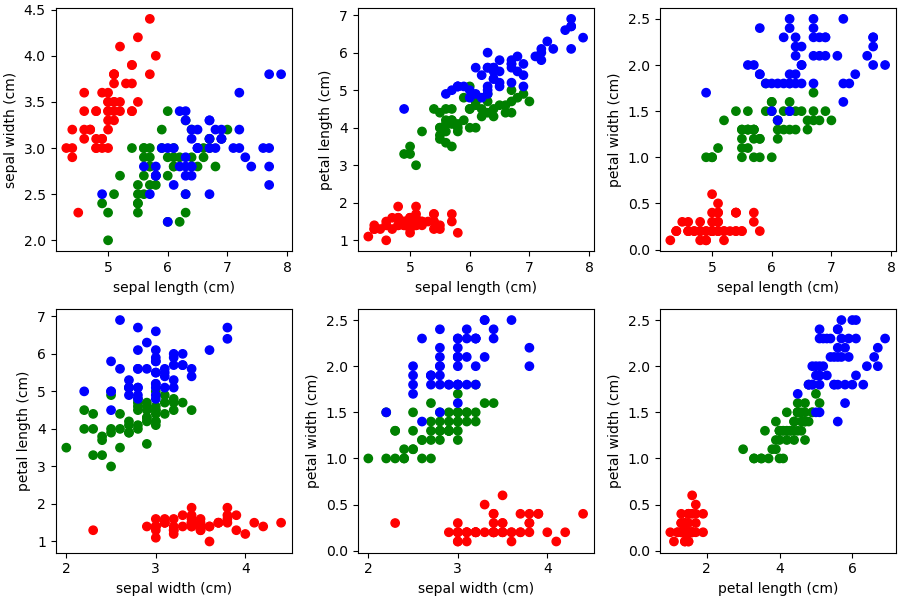

In [29]:
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
fig, ax = plt.subplots(2,3, figsize=(9,6), constrained_layout = True)

# set cmap
from matplotlib.colors import ListedColormap
colours = ListedColormap(['r','g','b'])

from itertools import combinations 
comb = list(combinations([0, 1, 2, 3], 2))

item = 0
for i in range(2):
    for j in range(3):
        ax[i][j].scatter(iris_df.iloc[:,comb[item][0]], iris_df.iloc[:,comb[item][1]], c=iris_df['target'], cmap=colours)
        ax[i][j].set_xlabel(iris_df.columns[comb[item][0]])
        ax[i][j].set_ylabel(iris_df.columns[comb[item][1]])
        item += 1

## 4. 資料切割
將現有資料隨機拆分為 Train組和 Test組  

### why split into train and test group?
because if we use the train data to do test, result should be 100% accuracy, because we used them to train!

In [44]:
from sklearn.model_selection import train_test_split
iris_split = train_test_split(iris_df, test_size = 75)
display(iris_split[0]) # train
display(iris_split[1]) # test

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,target names,target_color
12,4.8,3.0,1.4,0.1,0,setosa,r
18,5.7,3.8,1.7,0.3,0,setosa,r
29,4.7,3.2,1.6,0.2,0,setosa,r
73,6.1,2.8,4.7,1.2,1,versicolor,g
100,6.3,3.3,6.0,2.5,2,virginica,b
...,...,...,...,...,...,...,...
106,4.9,2.5,4.5,1.7,2,virginica,b
63,6.1,2.9,4.7,1.4,1,versicolor,g
87,6.3,2.3,4.4,1.3,1,versicolor,g
142,5.8,2.7,5.1,1.9,2,virginica,b


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,target names,target_color
51,6.4,3.2,4.5,1.5,1,versicolor,g
61,5.9,3.0,4.2,1.5,1,versicolor,g
28,5.2,3.4,1.4,0.2,0,setosa,r
0,5.1,3.5,1.4,0.2,0,setosa,r
132,6.4,2.8,5.6,2.2,2,virginica,b
...,...,...,...,...,...,...,...
43,5.0,3.5,1.6,0.6,0,setosa,r
70,5.9,3.2,4.8,1.8,1,versicolor,g
116,6.5,3.0,5.5,1.8,2,virginica,b
104,6.5,3.0,5.8,2.2,2,virginica,b


## 5. extract data X and target y for both train and test datas

In [45]:
X_train = iris_split[0].iloc[:,:4]
y_train = iris_split[0].iloc[:,4]
X_test = iris_split[1].iloc[:,:4]
y_test = iris_split[1].iloc[:,4]

## 6. apply KNN training!

The idea od K nearest neighbor is, if the nearest n neighbors of a certain data is mostly a certain category, the data would most likely be that category.

In [46]:
from sklearn.neighbors import KNeighborsClassifier
model = KNeighborsClassifier(n_neighbors=3)
model.fit(X_train,y_train)

predict1= model.predict(X_test)
print(predict1)
print(y_test)
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test,predict1))

[1 1 0 0 2 0 1 2 2 2 1 1 0 0 1 0 0 1 0 1 2 0 0 0 1 2 1 2 1 0 2 1 0 1 2 2 0
 1 2 0 2 0 0 0 0 2 0 2 2 2 1 2 2 2 0 1 1 1 2 2 2 1 1 0 0 2 2 2 0 2 0 2 2 2
 1]
51     1
61     1
28     0
0      0
132    2
      ..
43     0
70     1
116    2
104    2
91     1
Name: target, Length: 75, dtype: int32
0.9466666666666667


## other accuracy tools        

In [47]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

print('分類報告：', classification_report(y_test, predict1))
print('混淆矩陣：', confusion_matrix(y_test, predict1))

分類報告：               precision    recall  f1-score   support

           0       1.00      1.00      1.00        25
           1       0.95      0.87      0.91        23
           2       0.90      0.96      0.93        27

    accuracy                           0.95        75
   macro avg       0.95      0.94      0.95        75
weighted avg       0.95      0.95      0.95        75

混淆矩陣： [[25  0  0]
 [ 0 20  3]
 [ 0  1 26]]


In [ ]:
import numpy as np

class KNN:
    def __init__(self, n_neighbors = 5, x = none, y = none):
        self.n = n_neighbors       
        if x and y :
            self.fit(x,y)
        return self
    def fit(self,x,y):
        self.X = x
        self.Y = y
        return self
    def predict(self,test):
        neightborhood = 1
        isneightbor = True
        countneighbor = 0
        for row in test:
            for i in range(len(test.columns))
            if row[i]
        